In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Dataset\BC250_2017_Terra_Indigena_A.csv')

In [3]:
df.head()

,FID,id_objeto,nome,nomeabrev,geometriaaproximada,perimetrooficial,areaoficialha,grupoetnico,datasituacaojuridica,situacaojuridica,nometi,id_produtor,id_elementoprodutor,codigofunai,geom
0,BC250_2017_Terra_Indigena_A.1,1,Pacheca,Pacheca,Não,28109800.0,185.21,Guarani,2001/1/15,Regularizada,Pacheca,250000,2.0,NaN,MULTIPOLYGON (((-51.817032999999896 -31.170511...
1,BC250_2017_Terra_Indigena_A.2,2,Cantagalo,Cantagalo,Não,885605.0,283.68,Guarani Mbyá,2007/1/11,Homologada ou demarcada,Cantagalo,250000,3.0,NaN,MULTIPOLYGON (((-51.0340119999999 -30.19090999...
2,BC250_2017_Terra_Indigena_A.3,3,Guarani de Águas Brancas,Guarani de Águas Brancas,Não,9000000.0,230.00,Guarani,1996/2/13,Declarada,Guarani de Águas Brancas,250000,4.0,NaN,"MULTIPOLYGON (((-51.60478499999989 -30.766948,..."
3,BC250_2017_Terra_Indigena_A.4,4,Capivari,Capivari,Não,3465950.0,43.32,Guarani Mbyá,2003/1/8,Regularizada,Capivari,250000,7.0,NaN,MULTIPOLYGON (((-50.359660999999896 -30.359487...
4,BC250_2017_Terra_Indigena_A.5,5,Salto Grande do Jacuí,Salto Grande do Jacuí,Não,7258320.0,234.96,Guarani,2002/11/20,Regularizada,Salto Grande do Jacuí,250000,1.0,NaN,MULTIPOLYGON (((-53.2281029999999 -29.07109199...


In [4]:
df = df.drop(columns=["FID","nome","geometriaaproximada","datasituacaojuridica","nometi", "id_produtor","codigofunai","id_elementoprodutor", "geom", "id_objeto", "areaoficialha", "grupoetnico","situacaojuridica"]).dropna()


In [5]:
df = df.groupby(by='nomeabrev')['perimetrooficial'].sum()

In [12]:
df = df.sort_values(axis=0,ascending=False)

In [14]:
df = df.head(10)

<AxesSubplot: title={'center': 'Comparação de areas indigenas (2017)'}, ylabel='perimetrooficial'>

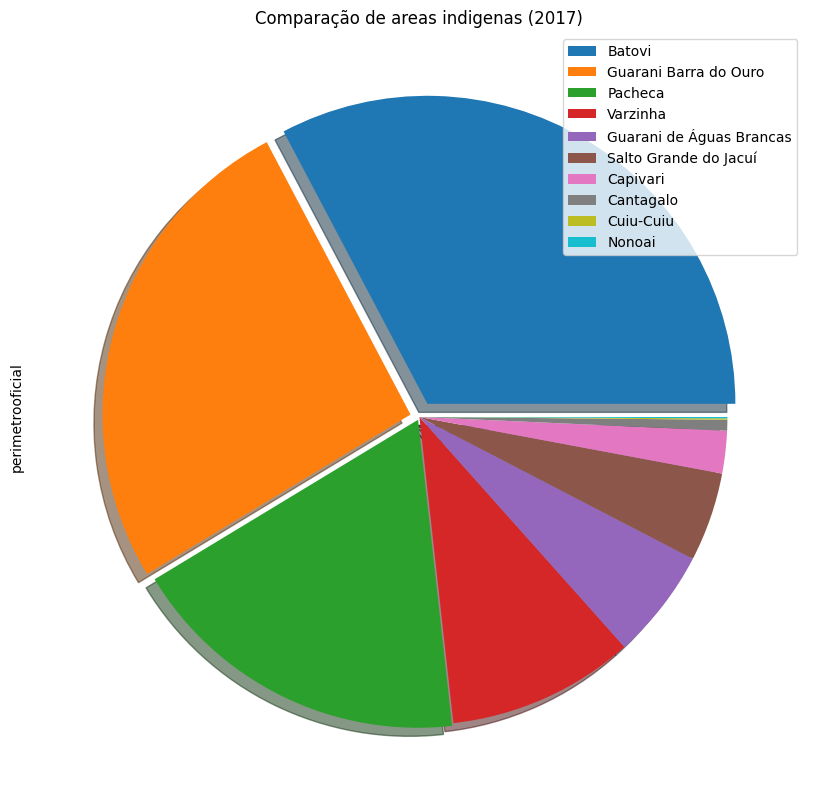

In [26]:
explodes = [0.05,0.03,0.01,0,0,0,0,0,0,0]

df.plot(kind='pie', labels = None, figsize=(12,10), legend=True, title='Comparação de areas indigenas (2017)', explode=explodes, shadow=True)